In [13]:
# !pip install catboost

In [14]:
#import basic modules
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
import time
import seaborn as sns

warnings.filterwarnings("ignore") 
pd.set_option('max_rows', 500) 

# Exploratory Data Analysis
## 1. Getting the data

In [15]:
winter_data = pd.read_csv(
    'P:/Betty/Clothing_Jayson/TotalClothingValue+3Binary.csv', index_col=0)


In [16]:
winter_data.shape

(2038, 22)

In [17]:
winter_data.head()

,DAY,School,SchoolType,StartTime,AvgMaxDailyTemp,AvgMinDailyTemp,AvgIndoorRelativeHumidity,IndoorTempDuringSurvey,Grade,Age,...,Scarf/Cap,Tie,Stockings,TotalCLOwithChair,SwC,TSV,TPV,TCV,TSL,MC
SNo,,,,,,,,,,,,,,,,,,,,,
1,1,1,0,3,22.2,5.1,55.1,14.5,3,8,...,1,1,0,1.57,1,-1,2,2,1,2
2,1,1,0,3,22.2,5.1,55.1,14.5,3,8,...,1,1,0,1.21,1,-1,2,3,1,2
3,1,1,0,3,22.2,5.1,55.1,14.5,3,8,...,1,1,0,1.21,2,0,1,2,3,4
4,1,1,0,3,22.2,5.1,55.1,14.5,3,10,...,1,1,0,1.43,2,0,0,2,2,4
5,1,1,0,3,22.2,5.1,55.1,14.5,3,9,...,1,1,0,1.21,2,0,1,2,2,2


In [18]:
winter_data.describe()

,DAY,School,SchoolType,StartTime,AvgMaxDailyTemp,AvgMinDailyTemp,AvgIndoorRelativeHumidity,IndoorTempDuringSurvey,Grade,Age,...,Scarf/Cap,Tie,Stockings,TotalCLOwithChair,SwC,TSV,TPV,TCV,TSL,MC
count,2038.000000,2038.000000,2038.000000,2038.000000,2038.000000,2038.000000,2038.000000,2038.000000,2038.000000,2038.000000,...,2038.000000,2038.000000,2038.000000,2038.000000,2038.000000,2038.000000,2038.000000,2038.000000,2038.000000,2038.000000
mean,2.732581,2.709519,0.733562,2.299313,21.217076,6.254809,61.204711,14.496075,3.947007,9.524043,...,0.807655,0.394504,0.017174,1.396045,1.965653,-0.326300,0.693817,2.119235,1.996075,3.572620
std,1.309543,1.285857,0.442204,1.252473,1.744861,1.715494,7.081575,1.203274,0.797110,1.049188,...,0.394240,0.488864,0.129950,0.216997,0.301848,0.612427,0.691821,0.766258,0.822478,1.014077
min,1.000000,1.000000,0.000000,1.000000,17.600000,4.200000,44.230000,12.800000,3.000000,6.000000,...,0.000000,0.000000,0.000000,0.900000,1.000000,-2.000000,-1.000000,-3.000000,-2.000000,1.000000
25%,2.000000,1.000000,0.000000,1.000000,20.500000,5.000000,58.200000,13.600000,3.000000,9.000000,...,1.000000,0.000000,0.000000,1.210000,2.000000,-1.000000,0.000000,2.000000,2.000000,4.000000
50%,3.000000,3.000000,1.000000,2.000000,21.200000,5.600000,60.600000,14.100000,4.000000,10.000000,...,1.000000,0.000000,0.000000,1.410000,2.000000,0.000000,1.000000,2.000000,2.000000,4.000000
75%,4.000000,4.000000,1.000000,3.000000,22.400000,6.600000,65.400000,15.100000,5.000000,10.000000,...,1.000000,1.000000,0.000000,1.550000,2.000000,0.000000,1.000000,3.000000,2.000000,4.000000
max,5.000000,5.000000,1.000000,6.000000,24.200000,10.100000,75.600000,17.500000,5.000000,13.000000,...,1.000000,1.000000,1.000000,2.040000,3.000000,2.000000,2.000000,3.000000,3.000000,4.000000


In [19]:
winter_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2038 entries, 1 to 2038
Data columns (total 22 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   DAY                        2038 non-null   int64  
 1   School                     2038 non-null   int64  
 2   SchoolType                 2038 non-null   int64  
 3   StartTime                  2038 non-null   int64  
 4   AvgMaxDailyTemp            2038 non-null   float64
 5   AvgMinDailyTemp            2038 non-null   float64
 6   AvgIndoorRelativeHumidity  2038 non-null   float64
 7   IndoorTempDuringSurvey     2038 non-null   float64
 8   Grade                      2038 non-null   int64  
 9   Age                        2038 non-null   int64  
 10  Gender                     2038 non-null   int64  
 11  FormalClothing             2038 non-null   int64  
 12  Scarf/Cap                  2038 non-null   int64  
 13  Tie                        2038 non-null   int64

In [20]:
winter_data.columns

Index(['DAY', 'School', 'SchoolType', 'StartTime', 'AvgMaxDailyTemp',
       'AvgMinDailyTemp', 'AvgIndoorRelativeHumidity',
       'IndoorTempDuringSurvey', 'Grade', 'Age', 'Gender', 'FormalClothing',
       'Scarf/Cap', 'Tie', 'Stockings', 'TotalCLOwithChair', 'SwC', 'TSV',
       'TPV', 'TCV', 'TSL', 'MC'],
      dtype='object')

In [21]:
winter_data = winter_data.astype({
    'DAY':'category',
    'School':'category',
    'SchoolType': 'category',
    'StartTime': 'category',
    'Grade': 'category',
    'Gender': 'category',
    'FormalClothing': 'bool',
    'Scarf/Cap': 'bool',
    'Tie': 'bool',
    'Stockings': 'bool',
    'TSV':'category',
    'TPV':'category',
    'TCV':'category',
    'TSL':'category',
    'MC':'category',
    'SwC':'category',
})


In [22]:
winter_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2038 entries, 1 to 2038
Data columns (total 22 columns):
 #   Column                     Non-Null Count  Dtype   
---  ------                     --------------  -----   
 0   DAY                        2038 non-null   category
 1   School                     2038 non-null   category
 2   SchoolType                 2038 non-null   category
 3   StartTime                  2038 non-null   category
 4   AvgMaxDailyTemp            2038 non-null   float64 
 5   AvgMinDailyTemp            2038 non-null   float64 
 6   AvgIndoorRelativeHumidity  2038 non-null   float64 
 7   IndoorTempDuringSurvey     2038 non-null   float64 
 8   Grade                      2038 non-null   category
 9   Age                        2038 non-null   int64   
 10  Gender                     2038 non-null   category
 11  FormalClothing             2038 non-null   bool    
 12  Scarf/Cap                  2038 non-null   bool    
 13  Tie                        2038 n

## Distributions of Numerical Features

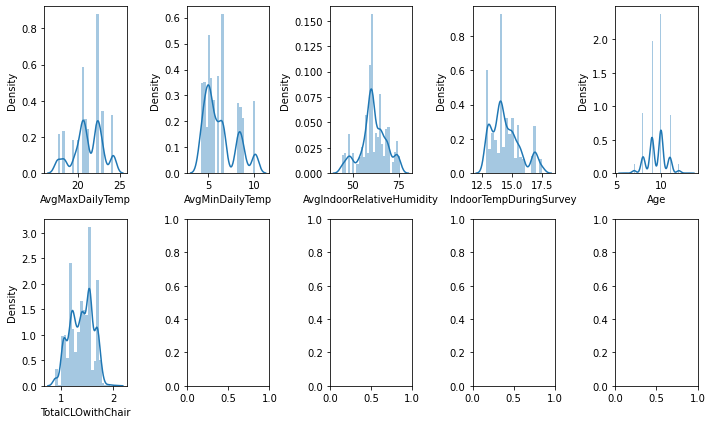

In [23]:
# create a new dataframe with columns containing only the numerical features
num_features = winter_data.select_dtypes(exclude=['bool', 'category']).copy()

# we plot individual column distributions with null entry rows dropped
fig, axs = plt.subplots(2, 5, figsize=(10, 6))
for i in range(len(num_features.columns)):
    plt.subplot(2, 5, i+1)
    sns.distplot(num_features.iloc[:,i].dropna())
    plt.xlabel(num_features.columns[i])

plt.tight_layout()
plt.show()

## Distributions of Categorical Features

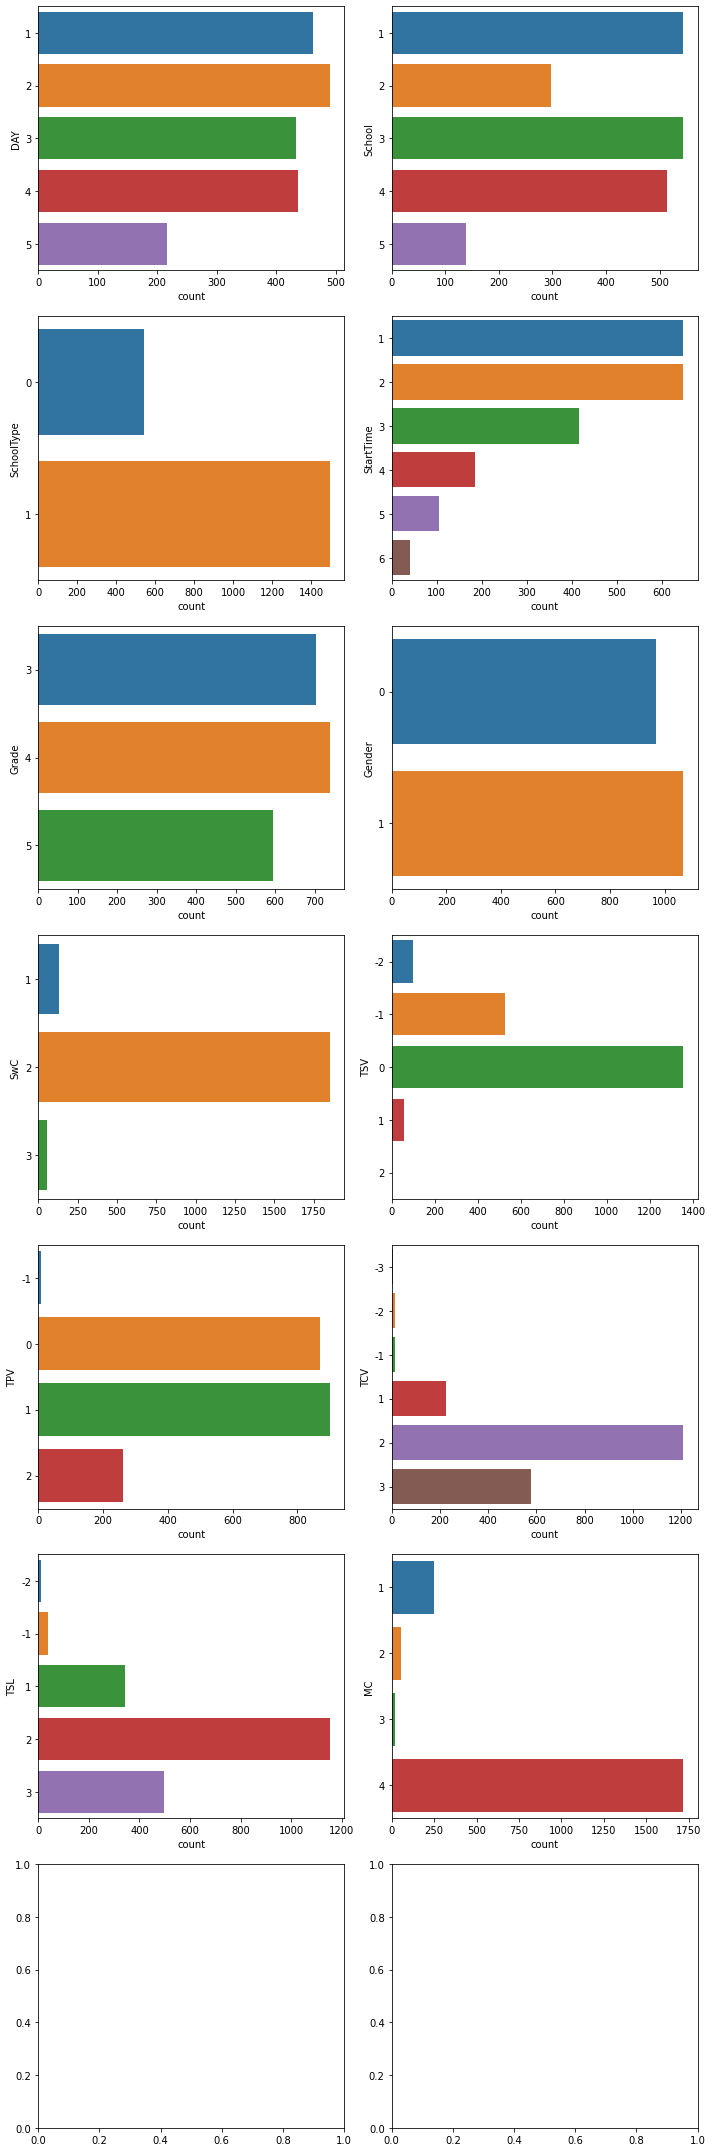

In [24]:
# create a new dataframe with columns containing only the categorical features
cat_features = winter_data.select_dtypes(include=['category']).copy()

# we plot individual column distributions with null entry rows dropped
fig, axs = plt.subplots(nrows=7, ncols=2, figsize=(10, 30))
plt.subplots_adjust(right=1.5, top=1.25)

for i in range(len(cat_features.columns)):
    plt.subplot(7, 2, i+1)
    sns.countplot(y=cat_features.columns[i], data=cat_features)
    
plt.tight_layout()
plt.show()

## Distributions of Boolean Features

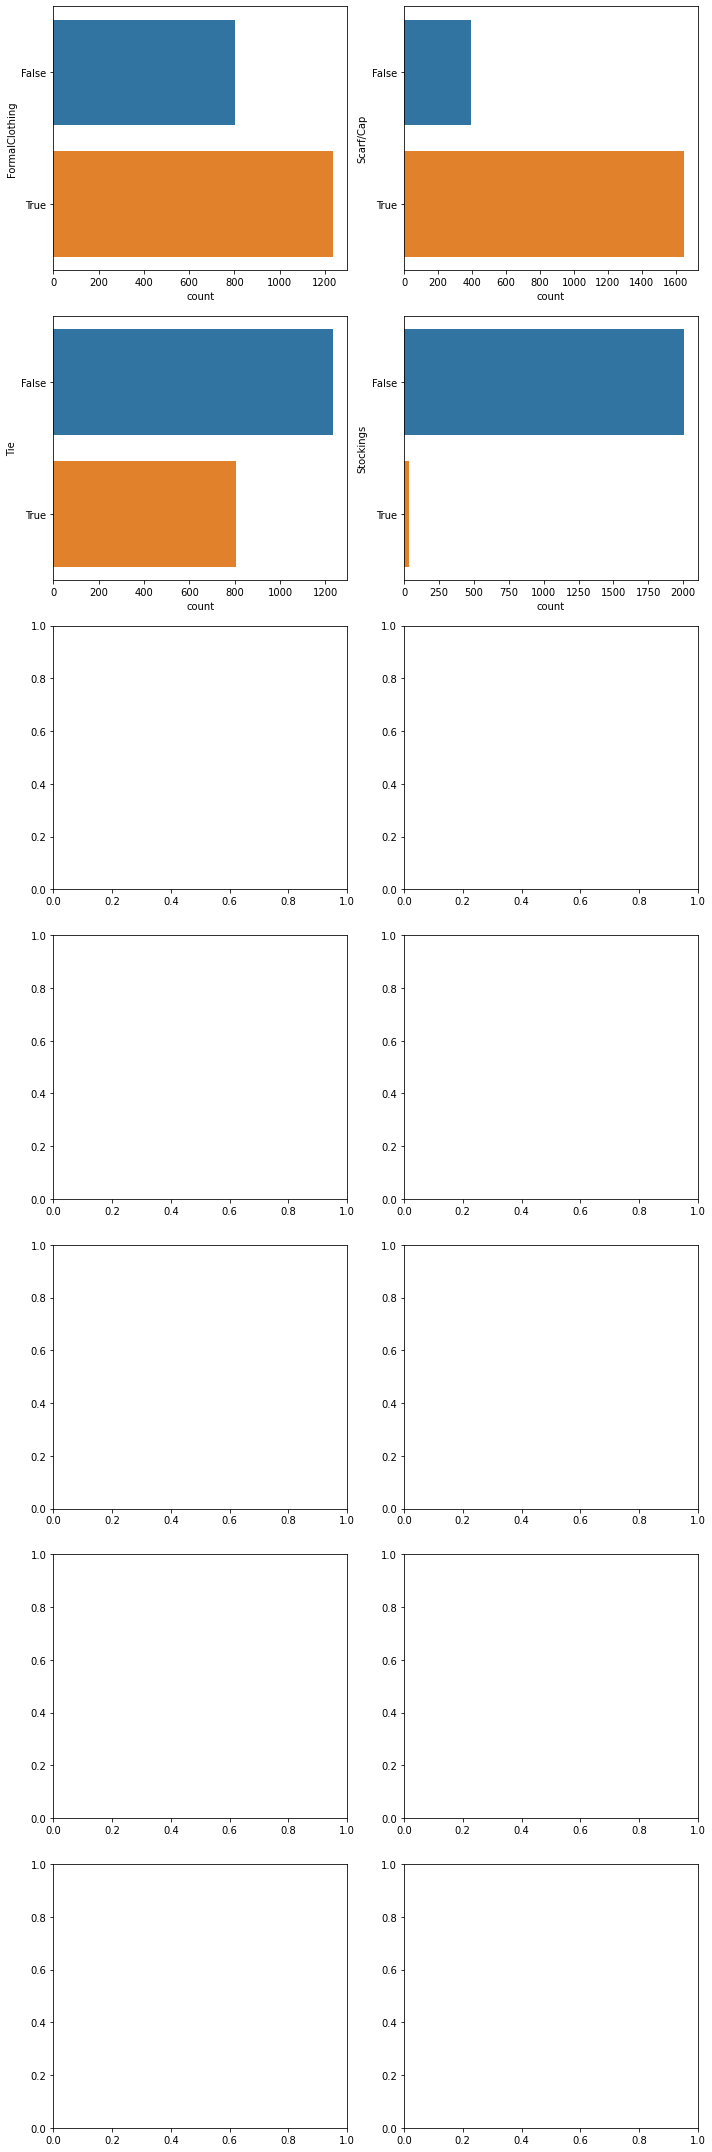

In [25]:
# create a new dataframe with columns containing only the categorical features
bool_features = winter_data.select_dtypes(include='bool').copy()

# we plot individual column distributions with null entry rows dropped
fig, axs = plt.subplots(nrows=7, ncols=2, figsize=(10, 30))
plt.subplots_adjust(right=1.5, top=1.25)

for i in range(len(bool_features.columns)):
    plt.subplot(7, 2, i+1)
    sns.countplot(y=bool_features.columns[i], data=bool_features)
    
plt.tight_layout()
plt.show()

In [26]:
tsl_target_data = winter_data.copy()

## Machine Learning Models (CatBoost)

In [27]:
import catboost as cat
# Classification metrics 
from sklearn.metrics import precision_score, cohen_kappa_score, f1_score, accuracy_score, recall_score
# Helper for cross-validation
from sklearn.model_selection import StratifiedKFold

In [28]:
def oof_trainer(X: pd.DataFrame,
                y,
            n_folds = None,
            params: dict = None,
            del_cols: list = None,
            cat_features=None):
    
    """This function trains multiple Catboost model while performing stratified CV with shuffling.
    out-of-fold (oof) predictions are evaluated at each fold and printed out 
    at the end of the routine as a list. The mean scores on all fold is also printed out.
    
    The metrics used for evaluation are precision_auc and the cohen's kappa
    
    Output: 
    models -- a list of models trained on each fold during CV
    oof_pred -- prediction array consisting of predictions coming from different models
    """
        
    # collect models and scores from each fold
    models = []
    f1_scores = []
    accuracy_scores = []
    precision_scores = []
    recall_scores = []
    scores = []
    # CV splitter
    folds = StratifiedKFold(n_splits=n_folds, shuffle=True, random_state=505) #GroupKFold(n_splits=n_folds) 
    #features to use
    columns = [col for col in X.columns.values if not col in del_cols]
    # dimension of the target 
    n_target=1
    
    # collect out-of-sample predictions
    data_X, data_y, oof_pred = pd.DataFrame(), pd.Series(), np.zeros((len(X),n_target))


    for fold_n, (train_index, valid_index) in enumerate(folds.split(X, y)):
     
        print('Fold {} started at {}'.format(fold_n + 1,time.ctime()))
        #print((train_index, valid_index))
        X_train, X_valid = X.iloc[train_index][columns], X.iloc[valid_index][columns]
        y_train, y_valid = y.iloc[train_index], y.iloc[valid_index]
    
        data_X = data_X.append(X_valid)
        data_y = data_y.append(y_valid)
        print(data_X.shape)
        
        #Eval set preparation
        eval_set = [(X_train, y_train)]
       # eval_names = ['train']
        eval_set.append((X_valid, y_valid))
       # eval_names.append('valid')
    
        model = cat.CatBoostClassifier()
        model.fit(X=X_train, y=y_train, 
                       eval_set=eval_set, 
                       verbose=500, early_stopping_rounds=150,
                      cat_features=cat_features, use_best_model=True, plot=True)
        
        oof_pred[valid_index] = model.predict(X_valid).reshape(-1, n_target)
        models.append(model)
    
        print('-'*30)
        
        scores.append(cohen_kappa_score(y_valid, oof_pred[valid_index], weights='quadratic'))
        f1_scores.append(f1_score(y_valid, oof_pred[valid_index],   average=None))
        accuracy_scores.append(accuracy_score(y_valid, oof_pred[valid_index]))
        precision_scores.append(precision_score(y_valid, oof_pred[valid_index],   average=None))
        recall_scores.append(recall_score(y_valid, oof_pred[valid_index],   average=None))

    print(f'catb fold kappa scores: {scores}')
    print(f'catb fold kappa scores mean: {np.mean(scores)}')
    print(f'catb fold f1 scores: {f1_scores}')
    print(f'catb fold f1 scores mean: {np.mean(f1_scores)}')
    print(f'catb fold precision-micro scores: {precision_scores}')
    print(f'catb fold precision-micro scores mean: {np.mean(precision_scores)}')
    print(f'catb fold recall-micro scores: {recall_scores}')
    print(f'catb fold recall-micro scores mean: {np.mean(recall_scores)}')
    print(f'catb fold accuracy scores: {accuracy_scores}')
    print(f'catb fold accuracy scores mean: {np.mean(accuracy_scores)}')
   
    return models, oof_pred


In [29]:
tsl_target_data.columns

Index(['DAY', 'School', 'SchoolType', 'StartTime', 'AvgMaxDailyTemp',
       'AvgMinDailyTemp', 'AvgIndoorRelativeHumidity',
       'IndoorTempDuringSurvey', 'Grade', 'Age', 'Gender', 'FormalClothing',
       'Scarf/Cap', 'Tie', 'Stockings', 'TotalCLOwithChair', 'SwC', 'TSV',
       'TPV', 'TCV', 'TSL', 'MC'],
      dtype='object')

# Target: TSL

In [30]:
# feature selection for Catboost
models, oof_pred = oof_trainer(X=tsl_target_data,
                    y=tsl_target_data.TSL,
                    n_folds = 5,
                   # params=params,
                    del_cols=['TSV',
       'TPV','TCV', 'TSL'],
                    cat_features=cat_features.drop(columns=['TSV',
       'TPV','TCV', 'TSL']).columns.values.tolist())

Fold 1 started at Tue Aug 23 02:01:10 2022
(408, 18)


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Learning rate set to 0.109036
0:	learn: 1.5173202	test: 1.5173202	test1: 1.5205560	best: 1.5205560 (0)	total: 211ms	remaining: 3m 30s
Stopped by overfitting detector  (150 iterations wait)

bestTest = 1.018622865
bestIteration = 161

Shrink model to first 162 iterations.
------------------------------
Fold 2 started at Tue Aug 23 02:01:26 2022
(816, 18)


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Learning rate set to 0.109036
0:	learn: 1.5145826	test: 1.5121975	test1: 1.5125530	best: 1.5125530 (0)	total: 37ms	remaining: 36.9s
Stopped by overfitting detector  (150 iterations wait)

bestTest = 1.001320787
bestIteration = 117

Shrink model to first 118 iterations.
------------------------------
Fold 3 started at Tue Aug 23 02:01:38 2022
(1224, 18)


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Learning rate set to 0.109036
0:	learn: 1.5156589	test: 1.5111131	test1: 1.5147401	best: 1.5147401 (0)	total: 48.8ms	remaining: 48.7s
Stopped by overfitting detector  (150 iterations wait)

bestTest = 1.020420581
bestIteration = 90

Shrink model to first 91 iterations.
------------------------------
Fold 4 started at Tue Aug 23 02:01:49 2022
(1631, 18)


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Learning rate set to 0.109038
0:	learn: 1.5171305	test: 1.5173514	test1: 1.5232298	best: 1.5232298 (0)	total: 52.3ms	remaining: 52.3s
Stopped by overfitting detector  (150 iterations wait)

bestTest = 1.015536894
bestIteration = 165

Shrink model to first 166 iterations.
------------------------------
Fold 5 started at Tue Aug 23 02:02:03 2022
(2038, 18)


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Learning rate set to 0.109038
0:	learn: 1.5104903	test: 1.5082834	test1: 1.5104451	best: 1.5104451 (0)	total: 47.6ms	remaining: 47.6s
Stopped by overfitting detector  (150 iterations wait)

bestTest = 1.030593904
bestIteration = 79

Shrink model to first 80 iterations.
------------------------------
catb fold kappa scores: [0.07184296272748936, 0.08979821529061816, 0.07870967741935497, 0.09252186051922362, 0.07111288219098688]
catb fold kappa scores mean: 0.08079711962953459
catb fold f1 scores: [array([0.        , 0.        , 0.02597403, 0.71986971, 0.15652174]), array([0.        , 0.        , 0.15      , 0.70915033, 0.10526316]), array([0.        , 0.        , 0.12195122, 0.71404959, 0.13445378]), array([0.        , 0.        , 0.07792208, 0.72396694, 0.19672131]), array([0.        , 0.        , 0.14285714, 0.70187394, 0.18045113])]
catb fold f1 scores mean: 0.19444104327702516
catb fold precision-micro scores: [array([0.        , 0.        , 0.125     , 0.57552083, 0.5625    ]), arr

## Feature importance

In [31]:
best_gb_model = models[1]
best_gb_model.get_feature_importance(prettified=True)

,Feature Id,Importances
0,Grade,16.686307
1,School,14.239334
2,DAY,9.518013
3,StartTime,7.108215
4,TotalCLOwithChair,6.762387
5,IndoorTempDuringSurvey,6.359659
6,AvgMinDailyTemp,6.292830
7,AvgIndoorRelativeHumidity,5.660901
8,Gender,5.104297
9,SwC,4.890008


# Target: TPV

In [32]:
# feature selection for Catboost
# Remove all rows with TPV value -1
models, oof_pred = oof_trainer(X=tsl_target_data[tsl_target_data.TPV != -1],
                    y=tsl_target_data[tsl_target_data.TPV != -1].TPV,
                    n_folds = 5,
                   # params=params,
                    del_cols=['TSV',
       'TSL','TCV', 'TSL', 'TPV'],
                    cat_features=cat_features.drop(columns=['TSV', 'TPV',
       'TSL','TCV', 'TSL']).columns.values.tolist())

Fold 1 started at Tue Aug 23 02:02:14 2022
(406, 18)


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Learning rate set to 0.109027
0:	learn: 1.0732363	test: 1.0729207	test1: 1.0778937	best: 1.0778937 (0)	total: 33.9ms	remaining: 33.9s
Stopped by overfitting detector  (150 iterations wait)

bestTest = 0.9429194604
bestIteration = 46

Shrink model to first 47 iterations.
------------------------------
Fold 2 started at Tue Aug 23 02:02:21 2022
(812, 18)


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Learning rate set to 0.109027
0:	learn: 1.0733733	test: 1.0731404	test1: 1.0746156	best: 1.0746156 (0)	total: 65.9ms	remaining: 1m 5s
Stopped by overfitting detector  (150 iterations wait)

bestTest = 0.9189712245
bestIteration = 140

Shrink model to first 141 iterations.
------------------------------
Fold 3 started at Tue Aug 23 02:02:31 2022
(1218, 18)


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Learning rate set to 0.109027
0:	learn: 1.0735653	test: 1.0734325	test1: 1.0765480	best: 1.0765480 (0)	total: 73.6ms	remaining: 1m 13s
Stopped by overfitting detector  (150 iterations wait)

bestTest = 0.9318439624
bestIteration = 72

Shrink model to first 73 iterations.
------------------------------
Fold 4 started at Tue Aug 23 02:02:38 2022
(1624, 18)


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Learning rate set to 0.109027
0:	learn: 1.0724834	test: 1.0726373	test1: 1.0743570	best: 1.0743570 (0)	total: 41.9ms	remaining: 41.9s
Stopped by overfitting detector  (150 iterations wait)

bestTest = 0.9366431128
bestIteration = 114

Shrink model to first 115 iterations.
------------------------------
Fold 5 started at Tue Aug 23 02:02:48 2022
(2029, 18)


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Learning rate set to 0.109028
0:	learn: 1.0741702	test: 1.0741702	test1: 1.0765939	best: 1.0765939 (0)	total: 57.8ms	remaining: 57.8s
Stopped by overfitting detector  (150 iterations wait)

bestTest = 0.9187348046
bestIteration = 119

Shrink model to first 120 iterations.
------------------------------
catb fold kappa scores: [0.1447139394530932, 0.2620121764267881, 0.19308357348703176, 0.16517309108765044, 0.2797004258651916]
catb fold kappa scores mean: 0.208936641263951
catb fold f1 scores: [array([0.52661064, 0.5436409 , 0.03703704]), array([0.61734694, 0.5325779 , 0.14925373]), array([0.53868195, 0.55121951, 0.03773585]), array([0.54945055, 0.55208333, 0.125     ]), array([0.58659218, 0.55276382, 0.07407407])]
catb fold f1 scores mean: 0.39827122781680285
catb fold precision-micro scores: [array([0.51086957, 0.49321267, 1.        ]), array([0.55504587, 0.54022989, 0.35714286]), array([0.53714286, 0.49130435, 1.        ]), array([0.52631579, 0.51960784, 0.33333333]), array([0.56756

In [33]:
best_gb_model = models[1]
best_gb_model.get_feature_importance(prettified=True)

,Feature Id,Importances
0,School,12.529406
1,DAY,9.835528
2,TotalCLOwithChair,9.734226
3,Grade,9.728490
4,StartTime,7.670513
5,SwC,7.156860
6,AvgIndoorRelativeHumidity,7.083991
7,IndoorTempDuringSurvey,6.056400
8,Gender,5.775354
9,Age,5.731561


# Target: TSV

In [34]:
models, oof_pred = oof_trainer(X=tsl_target_data[tsl_target_data.TSV != 2],
                    y=tsl_target_data[tsl_target_data.TSV != 2].TSV,
                    n_folds = 5,
                   # params=params,
                    del_cols=['TSV',
       'TSL','TCV', 'TSL', 'TPV'],
                    cat_features=cat_features.drop(columns=['TSV', 'TPV',
       'TSL','TCV', 'TSL']).columns.values.tolist())

Fold 1 started at Tue Aug 23 02:02:57 2022
(408, 18)


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Learning rate set to 0.109035
0:	learn: 1.2882157	test: 1.2880071	test1: 1.2906356	best: 1.2906356 (0)	total: 43.8ms	remaining: 43.8s
Stopped by overfitting detector  (150 iterations wait)

bestTest = 0.760633
bestIteration = 288

Shrink model to first 289 iterations.
------------------------------
Fold 2 started at Tue Aug 23 02:03:14 2022
(816, 18)


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Learning rate set to 0.109035
0:	learn: 1.2779973	test: 1.2779973	test1: 1.2800223	best: 1.2800223 (0)	total: 12.3ms	remaining: 12.3s
Stopped by overfitting detector  (150 iterations wait)

bestTest = 0.8397046376
bestIteration = 47

Shrink model to first 48 iterations.
------------------------------
Fold 3 started at Tue Aug 23 02:03:21 2022
(1223, 18)


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Learning rate set to 0.109036
0:	learn: 1.2778132	test: 1.2778132	test1: 1.2818718	best: 1.2818718 (0)	total: 34.3ms	remaining: 34.2s
Stopped by overfitting detector  (150 iterations wait)

bestTest = 0.8080684209
bestIteration = 111

Shrink model to first 112 iterations.
------------------------------
Fold 4 started at Tue Aug 23 02:03:31 2022
(1630, 18)


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Learning rate set to 0.109036
0:	learn: 1.2832136	test: 1.2832136	test1: 1.2877741	best: 1.2877741 (0)	total: 32.6ms	remaining: 32.6s
Stopped by overfitting detector  (150 iterations wait)

bestTest = 0.8228562524
bestIteration = 110

Shrink model to first 111 iterations.
------------------------------
Fold 5 started at Tue Aug 23 02:03:41 2022
(2037, 18)


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Learning rate set to 0.109036
0:	learn: 1.2794346	test: 1.2794346	test1: 1.2788632	best: 1.2788632 (0)	total: 32.4ms	remaining: 32.4s
Stopped by overfitting detector  (150 iterations wait)

bestTest = 0.7755721803
bestIteration = 77

Shrink model to first 78 iterations.
------------------------------
catb fold kappa scores: [0.14278249510124097, 0.01686746987951815, 0.10255734247297654, 0.055281856939839, 0.0762284196547145]
catb fold kappa scores mean: 0.07874351680965783
catb fold f1 scores: [array([0.18181818, 0.27338129, 0.81632653, 0.22222222]), array([0.        , 0.06722689, 0.7987988 , 0.        ]), array([0.        , 0.171875  , 0.80551302, 0.        ]), array([0.        , 0.18439716, 0.79563183, 0.        ]), array([0.        , 0.12598425, 0.80792683, 0.        ])]
catb fold f1 scores mean: 0.26255510028237417
catb fold precision-micro scores: [array([1.        , 0.57575758, 0.71038251, 0.28571429]), array([0.        , 0.30769231, 0.67341772, 0.        ]), array([0.        , 0

In [35]:
best_gb_model = models[1]
best_gb_model.get_feature_importance(prettified=True)

,Feature Id,Importances
0,SwC,26.227470
1,School,14.897753
2,SchoolType,11.212376
3,StartTime,5.857116
4,IndoorTempDuringSurvey,5.743074
5,AvgMinDailyTemp,5.522691
6,Grade,5.265538
7,MC,4.420758
8,Age,3.980291
9,AvgMaxDailyTemp,3.077736


# Target: TCV

In [36]:
models, oof_pred = oof_trainer(X=tsl_target_data[tsl_target_data.TCV != -3],
                    y=tsl_target_data[tsl_target_data.TCV != -3].TCV,
                    n_folds = 5,
                   # params=params,
                    del_cols=['TSV',
       'TSL','TCV', 'TSL', 'TPV'],
                    cat_features=cat_features.drop(columns=['TSV', 'TPV',
       'TSL','TCV', 'TSL']).columns.values.tolist())

Fold 1 started at Tue Aug 23 02:03:50 2022
(407, 18)


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Learning rate set to 0.109031
0:	learn: 1.4874183	test: 1.4874183	test1: 1.4881246	best: 1.4881246 (0)	total: 39ms	remaining: 38.9s
Stopped by overfitting detector  (150 iterations wait)

bestTest = 0.8759446001
bestIteration = 117

Shrink model to first 118 iterations.
------------------------------
Fold 2 started at Tue Aug 23 02:04:02 2022
(814, 18)


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Learning rate set to 0.109031
0:	learn: 1.4898096	test: 1.4898096	test1: 1.4939551	best: 1.4939551 (0)	total: 50.6ms	remaining: 50.6s
Stopped by overfitting detector  (150 iterations wait)

bestTest = 0.9248194762
bestIteration = 115

Shrink model to first 116 iterations.
------------------------------
Fold 3 started at Tue Aug 23 02:04:14 2022
(1221, 18)


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Learning rate set to 0.109031
0:	learn: 1.4893028	test: 1.4893028	test1: 1.4943083	best: 1.4943083 (0)	total: 60.5ms	remaining: 1m
Stopped by overfitting detector  (150 iterations wait)

bestTest = 0.9286420173
bestIteration = 134

Shrink model to first 135 iterations.
------------------------------
Fold 4 started at Tue Aug 23 02:04:27 2022
(1627, 18)


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Learning rate set to 0.109032
0:	learn: 1.4886198	test: 1.4884726	test1: 1.4912027	best: 1.4912027 (0)	total: 37ms	remaining: 37s
Stopped by overfitting detector  (150 iterations wait)

bestTest = 0.8921621226
bestIteration = 102

Shrink model to first 103 iterations.
------------------------------
Fold 5 started at Tue Aug 23 02:04:38 2022
(2033, 18)


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Learning rate set to 0.109032
0:	learn: 1.4903635	test: 1.4901519	test1: 1.4899813	best: 1.4899813 (0)	total: 40.3ms	remaining: 40.2s
Stopped by overfitting detector  (150 iterations wait)

bestTest = 0.8721255859
bestIteration = 123

Shrink model to first 124 iterations.
------------------------------
catb fold kappa scores: [0.13062334131659004, 0.11522705672867894, 0.06864988558352392, 0.11395033477413352, 0.08030724651013044]
catb fold kappa scores mean: 0.10175157298261137
catb fold f1 scores: [array([0.        , 0.        , 0.04347826, 0.74371859, 0.3253012 ]), array([0.       , 0.       , 0.       , 0.7454844, 0.2875817]), array([0.        , 0.        , 0.        , 0.72696817, 0.25301205]), array([0.        , 0.        , 0.        , 0.71821306, 0.30939227]), array([0.        , 0.        , 0.04166667, 0.75649351, 0.23776224])]
catb fold f1 scores mean: 0.20756288462356148
catb fold precision-micro scores: [array([0.        , 0.        , 1.        , 0.62535211, 0.52941176]), array

In [37]:
best_gb_model = models[0]
best_gb_model.get_feature_importance(prettified=True)

,Feature Id,Importances
0,Grade,15.971586
1,School,15.917892
2,TotalCLOwithChair,9.721556
3,DAY,9.697439
4,AvgIndoorRelativeHumidity,6.664651
5,IndoorTempDuringSurvey,6.405306
6,SwC,5.970547
7,MC,5.392499
8,AvgMinDailyTemp,5.076950
9,Age,3.976013
